# Backpropagation Model for JST-D Project
- Classifier class: BackpropagationModel()
- Dataset: train.csv and test.csv
- Feature used: Acc and Gravity

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from BackpropagationModel import BackpropagationModel

## Data Read and Clean

In [3]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [4]:
df_test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
selected_cols = [col for col in df_train.columns if "Acc" in col or "Gravity" in col]
selected_activities = ['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING']

In [6]:
selected_cols

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [7]:
df_train_filtered = df_train[df_train['Activity'].isin(selected_activities)].copy()
df_test_filtered = df_test[df_test['Activity'].isin(selected_activities)].copy()

y_train = df_train_filtered['Activity'].copy()
X_train = df_train_filtered[selected_cols].copy()

y_test = df_test_filtered['Activity'].copy()
X_test = df_test_filtered[selected_cols].copy()

In [8]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [9]:
X_train.shape

(3345, 345)

In [10]:
X_test.shape

(1382, 345)

In [11]:
y_train.shape

(3345,)

In [12]:
y_test.shape

(1382,)

## Train Backpropagation Model

In [12]:
bp_model = BackpropagationModel(layer_conf=[345, 10, 3])

In [13]:
param_grid = {
    'layer_conf':[[345, 10, 3], [345, 20, 3], [345, 50, 3], [345, 100, 3], [345, 200, 3]],
    'max_epoch':[100, 200, 500, 1000, 2000],
    'learn_rate':[.01, 0.025, 0.05, 0.1, 0.2, 0.5],
    'max_error':[0.001, .01, 0.05, .1, 0.5],
    'print_per_epoch': [-1]
}

In [16]:
grid_search = GridSearchCV(estimator=bp_model, 
                           param_grid=param_grid, 
                           scoring='accuracy',
                           cv=3, 
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 750 candidates, totalling 2250 fits


[CV] END layer_conf=[345, 10, 3], learn_rate=0.01, max_epoch=100, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.01, max_epoch=100, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.01, max_epoch=100, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.01, max_epoch=100, max_error=0.1, print_per_epoch=-1; total time=   0.7s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.01, max_epoch=100, max_error=0.05, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.01, max_epoch=100, max_error=0.1, print_per_epoch=-1; total time=   0.8s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.01, max_epoch=100, max_error=0.1, print_per_epoch=-1; total time=   1.0s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.01, max_epoch=100, max_error=0.05, print_per_epoch=-1; total time=   1.1s
[CV] END layer_conf=[345, 10, 3], lear

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=200, max_error=0.001, print_per_epoch=-1; total time=  36.9s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=200, max_error=0.001, print_per_epoch=-1; total time=  39.4s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=200, max_error=0.001, print_per_epoch=-1; total time=  41.7s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=500, max_error=0.05, print_per_epoch=-1; total time=   1.5s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   0.2s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=200, max_error=0.01, print_per_epoch=-1; total time=  40.5s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   0.4s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=500, max_error=0.5, print_per_epoch=-1; total time=   0.2s
[CV] END layer_conf=[345, 10, 3], learn_

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time=  26.1s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=1000, max_error=0.01, print_per_epoch=-1; total time=  30.5s


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 1.5min
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=1000, max_error=0.05, print_per_epoch=-1; total time=   1.5s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=1000, max_error=0.1, print_per_epoch=-1; total time=   0.2s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=1000, max_error=0.1, print_per_epoch=-1; total time=   0.4s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=1000, max_error=0.1, print_per_epoch=-1; total time=   0.4s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=1000, max_error=0.5, print_per_epoch=-1; total time=   0.2s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=1000, max_error=0.5, print_per_epoch=-1; total time=   0.2s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=1000, max_error=0.5, print_per_epoch=-1; total time=   0.2s
[CV] END layer_conf=[345, 10, 3], lear

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 10, 3], learn_rate=0.2, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time= 3.3min
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time=  29.3s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=   2.1s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.2s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=2000, max_error=0.5, print_per_epoch=-1; total time=   0.2s
[CV] END layer_conf=[345, 10, 3], learn_rate=0.5, max_epoch=2000, max_error=0.5, print_per_epoch=-1; total time=   0.3s
[CV] END layer_conf=[345, 10, 3], le

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.05, print_per_epoch=-1; total time=   1.2s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.05, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time=   3.3s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   0.6s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.05, print_per_epoch=-1; total time=   1.1s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   0.6s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.5, print_per_epoch=-1; total time=   0.7s
[CV] END layer_conf=[345, 100, 3], l

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 50, 3], learn_rate=0.5, max_epoch=2000, max_error=0.001, print_per_epoch=-1; total time= 9.8min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.05, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.05, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.01, print_per_epoch=-1; total time=   3.2s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.05, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 1

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 50, 3], learn_rate=0.5, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time= 9.4min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 3.8min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time=   2.3s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 3.8min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=   1.3s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time=   3.0s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=   1.2s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.7s
[CV] END layer_conf=[345,

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 4.0min
[CV] END layer_conf=[345, 50, 3], learn_rate=0.5, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time= 9.6min
[CV] END layer_conf=[345, 50, 3], learn_rate=0.5, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time= 9.5min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time= 3.8min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.001, print_per_epoch=-1; total time=  43.7s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.001, print_per_epoch=-1; total time=  44.3s


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.001, print_per_epoch=-1; total time=  49.6s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.01, print_per_epoch=-1; total time=  46.1s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], le

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 50, 3], learn_rate=0.5, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=10.4min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.05, print_per_epoch=-1; total time=  50.1s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=100, max_error=0.05, print_per_epoch=-1; total time=  48.4s
[CV] END layer_conf=[345, 50, 3], learn_rate=0.5, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=10.3min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=200, max_error=0.001, print_per_epoch=-1; total time= 1.5min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=200, max_error=0.001, print_per_epoch=-1; total time= 1.6min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=200, max_error=0.1, print_per_epoch=-1; total time=   0.6s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=200, max_error=0.1, print_per_epoch=-1; total time=   0.7s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=200, max_error=0.1, print_per_epoch=-1; total time=   0.7s
[CV] END layer_conf=[345, 100, 3]

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time= 7.5min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time= 7.7min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3],

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time= 7.8min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time= 3.7min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 3.9min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 4.0min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 3.9min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time= 3.8min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time= 4.0min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=500, max_error=0.05, print_per_epoch=-1; total time= 4.0min
[CV] END layer_conf=[345, 1

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=2000, max_error=0.001, print_per_epoch=-1; total time=15.8min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.2, max_epoch=2000, max_error=0.001, print_per_epoch=-1; total time=16.1min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=2000, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=2000, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=2000, max_error=0.5, print_per_epoch=-1; total time=   0.5s
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=1000, max_error=0.01, print_per_epoch=-1; total time= 7.5min
[CV] END layer_conf=[345, 100

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time=16.3min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time= 6.3min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.001, print_per_epoch=-1; total time= 1.3min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time= 7.1min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.001, print_per_epoch=-1; total time= 1.5min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.001, print_per_epoch=-1; total time= 1.3min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.01, print_per_epoch=-1; total time= 1.3min
[CV] END layer_conf=[345, 100, 3], learn_rate=0.5, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=16.5min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.1, print_per_epoch=-1; total time=   1.1s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.1, print_per_epoch=-1; total time=   1.0s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.1, print_per_epoch=-1; total time=   1.1s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.5, print_per_epoch=-1; total time=   1.1s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.5, print_per_epoch=-1; total time=   1.2s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.5, print_per_epoch=-1; total time=   1.2s


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.01, print_per_epoch=-1; total time= 1.4min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.01, print_per_epoch=-1; total time= 1.4min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.05, print_per_epoch=-1; total time= 1.5min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.05, print_per_epoch=-1; total time= 1.6min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=100, max_error=0.05, print_per_epoch=-1; total time= 1.4min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.001, print_per_epoch=-1; total time= 3.0min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.001, print_per_epoch=-1; total time= 2.6min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.001, print_per_epoch=-1; total time= 2.8min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.01, print_per_epoch=-1; total time= 2.5min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.1, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.1, print_per_epoch=-1; total time=   1.0s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.1, print_per_epoch=-1; total time=   1.2s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.5, print_per_epoch=-1; total time=   1.0s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.5, print_per_epoch=-1; total time=   0.8s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.5, print_per_epoch=-1; total time=   0.8s
[CV] END layer_conf=[345, 200, 3], le

/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.01, print_per_epoch=-1; total time= 3.0min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))
/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.05, print_per_epoch=-1; total time= 2.9min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.05, print_per_epoch=-1; total time= 2.5min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=200, max_error=0.05, print_per_epoch=-1; total time= 2.9min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time=13.7min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time=14.4min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time=14.0min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=1000, max_error=0.01, print_per_epoch=-1; total time=13.9min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   1.0s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   1.1s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.1, print_per_epoch=-1; total time=   1.0s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.5, print_per_epoch=-1; total time=   1.1s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.5, print_per_epoch=-1; total time=   1.0s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.5, print_per_epoch=-1; total time=   0.9s


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=1000, max_error=0.01, print_per_epoch=-1; total time=14.8min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 6.5min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 7.3min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.001, print_per_epoch=-1; total time= 7.7min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time= 6.5min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time= 6.8min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.01, print_per_epoch=-1; total time= 7.3min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.05, print_per_epoch=-1; total time= 7.0min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.05, print_per_epoch=-1; total time= 7.1min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.1, print_per_epoch=-1; total time=   0.8s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.1, print_per_epoch=-1; total time=   0.8s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.1, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.5, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.5, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.5, print_per_epoch=-1; total time=   0.9s


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=500, max_error=0.05, print_per_epoch=-1; total time= 7.8min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time=13.9min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=2000, max_error=0.001, print_per_epoch=-1; total time=27.9min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time=13.0min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time=26.3min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.001, print_per_epoch=-1; total time=15.6min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=2000, max_error=0.001, print_per_epoch=-1; total time=27.1min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.01, print_per_epoch=-1; total time=13.2min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=2000, max_error=0.001, print_per_epoch=-1; total time=28.4min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.01, print_per_epoch=-1; total time=14.6min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.1, print_per_epoch=-1; total time=   0.9s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.5, print_per_epoch=-1; total time=   1.2s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.5, print_per_epoch=-1; total time=   0.9s


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.2, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time=28.2min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.5, print_per_epoch=-1; total time=   1.0s
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.05, print_per_epoch=-1; total time=13.4min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.01, print_per_epoch=-1; total time=15.3min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.05, print_per_epoch=-1; total time=13.7min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=1000, max_error=0.05, print_per_epoch=-1; total time=14.6min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.001, print_per_epoch=-1; total time=26.6min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.001, print_per_epoch=-1; total time=28.1min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.001, print_per_epoch=-1; total time=24.9min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time=24.3min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time=24.5min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.01, print_per_epoch=-1; total time=25.5min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=24.0min


/home/ubuntu/Documents/jst-d-code/BackpropagationModel.py:27: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-X))


[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=25.5min
[CV] END layer_conf=[345, 200, 3], learn_rate=0.5, max_epoch=2000, max_error=0.05, print_per_epoch=-1; total time=26.2min


GridSearchCV(cv=3, estimator=BackpropagationModel(layer_conf=[345, 10, 3]),
             n_jobs=-1,
             param_grid={'layer_conf': [[345, 10, 3], [345, 20, 3],
                                        [345, 50, 3], [345, 100, 3],
                                        [345, 200, 3]],
                         'learn_rate': [0.01, 0.025, 0.05, 0.1, 0.2, 0.5],
                         'max_epoch': [100, 200, 500, 1000, 2000],
                         'max_error': [0.001, 0.01, 0.05, 0.1, 0.5],
                         'print_per_epoch': [-1]},
             scoring='accuracy', verbose=2)

In [ ]:
print("Best parameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

train_accuracy = best_model.score(X_train, y_train)
print("Train set accuracy: ", train_accuracy)

test_accuracy = best_model.score(X_test, y_test)
print("Test set accuracy: ", test_accuracy)

Best parameters:  {'layer_conf': [345, 20, 3], 'learn_rate': 0.2, 'max_epoch': 2000, 'max_error': 0.001, 'print_per_epoch': -1}
Train set accuracy:  0.996711509715994
Test set accuracy:  0.9761215629522432


## Save Model to Pickle

In [20]:
import pickle

filename = './model/backpropagation_model_v2.pkl'

with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

## Performance Evaluation

In [13]:
from sklearn.metrics import f1_score, confusion_matrix
import pickle

filename = './trained model/backpropagation_model_v2.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

y_pred = loaded_model.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

F1 Score:  0.9760893481353902
Confusion Matrix:
 [[490   0   1]
 [  0 392  28]
 [  0   4 467]]


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=encoder.classes_)
print(report)

                    precision    recall  f1-score   support

           SITTING       1.00      1.00      1.00       491
WALKING_DOWNSTAIRS       0.99      0.93      0.96       420
  WALKING_UPSTAIRS       0.94      0.99      0.97       471

          accuracy                           0.98      1382
         macro avg       0.98      0.97      0.98      1382
      weighted avg       0.98      0.98      0.98      1382



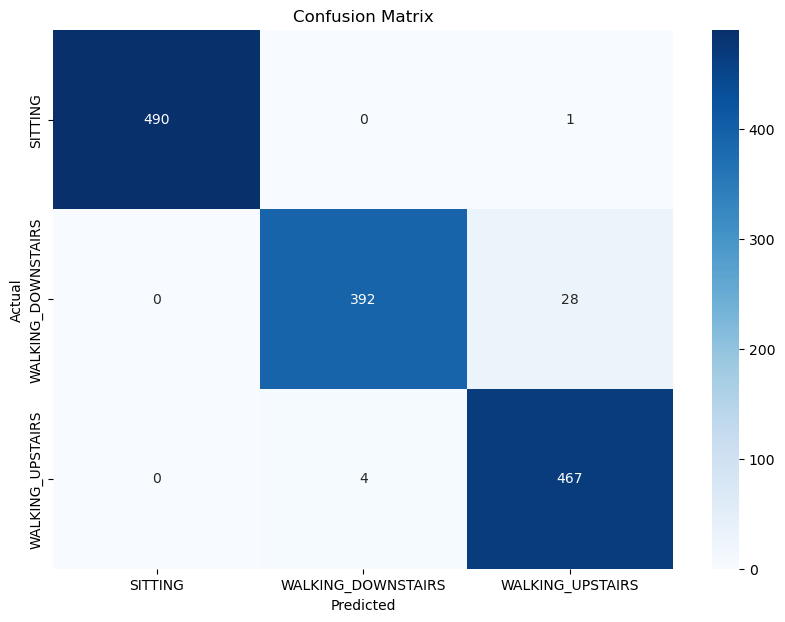

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()